<a href="https://colab.research.google.com/github/NDsasuke/Classification-Regression-Clustering/blob/main/Classification/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

loading libraries

In [7]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
import numpy as np

Preprocess

In [8]:
# load dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Make sure images have shape (28, 28, 1)
train_images = np.expand_dims(train_images, -1)
test_images = np.expand_dims(test_images, -1)

num_classes = 10
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

Model Building

In [9]:
# Create the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

Train the model

In [10]:
# Train the model
model.fit(train_images, train_labels, batch_size=128, epochs=5, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy:', test_acc)


Epoch 1/5
469/469 [==============================] - 54s 111ms/step - loss: 0.5266 - accuracy: 0.8116 - val_loss: 0.3805 - val_accuracy: 0.8645
Epoch 2/5
469/469 [==============================] - 55s 116ms/step - loss: 0.3416 - accuracy: 0.8767 - val_loss: 0.3537 - val_accuracy: 0.8694
Epoch 3/5
469/469 [==============================] - 51s 109ms/step - loss: 0.2961 - accuracy: 0.8925 - val_loss: 0.3212 - val_accuracy: 0.8835
Epoch 4/5
469/469 [==============================] - 51s 108ms/step - loss: 0.2664 - accuracy: 0.9022 - val_loss: 0.2940 - val_accuracy: 0.8930
Epoch 5/5
469/469 [==============================] - 51s 109ms/step - loss: 0.2424 - accuracy: 0.9110 - val_loss: 0.2763 - val_accuracy: 0.8999
313/313 - 2s - loss: 0.2763 - accuracy: 0.8999 - 2s/epoch - 7ms/step

Test accuracy: 0.8999000191688538


Confusion Matrix: A confusion matrix is a table often used to describe the performance of a classification model. Each row represents the instances in an actual class and each column represents the instances in a predicted class.

313/313 [==============================] - 3s 8ms/step


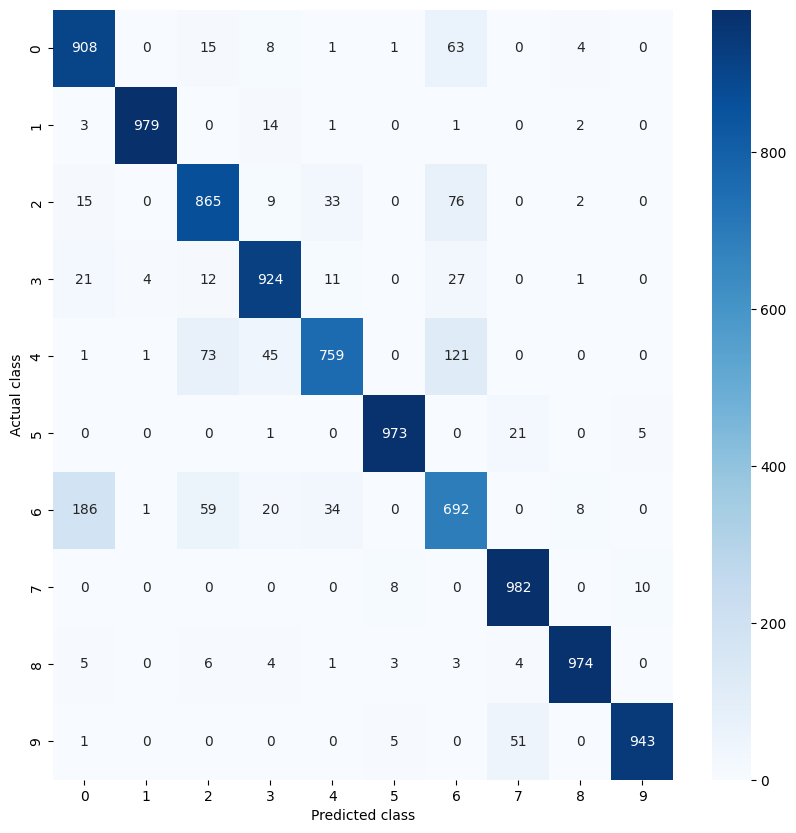

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get the model's predictions on the test dataset
predictions = model.predict(test_images)
predictions = np.argmax(predictions, axis=1)

# Get the true labels of the test dataset
true_labels = np.argmax(test_labels, axis=1)

# Create the confusion matrix
cm = confusion_matrix(true_labels, predictions)

# Plot the confusion matrix in a heatmap
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.ylabel('Actual class')
plt.xlabel('Predicted class')
plt.show()


Classification Report: A classification report shows the precision, recall, f1-score and support for each class

In [12]:
from sklearn.metrics import classification_report

# Print the classification report
print(classification_report(true_labels, predictions))


              precision    recall  f1-score   support

           0       0.80      0.91      0.85      1000
           1       0.99      0.98      0.99      1000
           2       0.84      0.86      0.85      1000
           3       0.90      0.92      0.91      1000
           4       0.90      0.76      0.82      1000
           5       0.98      0.97      0.98      1000
           6       0.70      0.69      0.70      1000
           7       0.93      0.98      0.95      1000
           8       0.98      0.97      0.98      1000
           9       0.98      0.94      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



Visualizing Predictions: Another way to analyze the model is by visualizing its predictions on a sample of the test images.

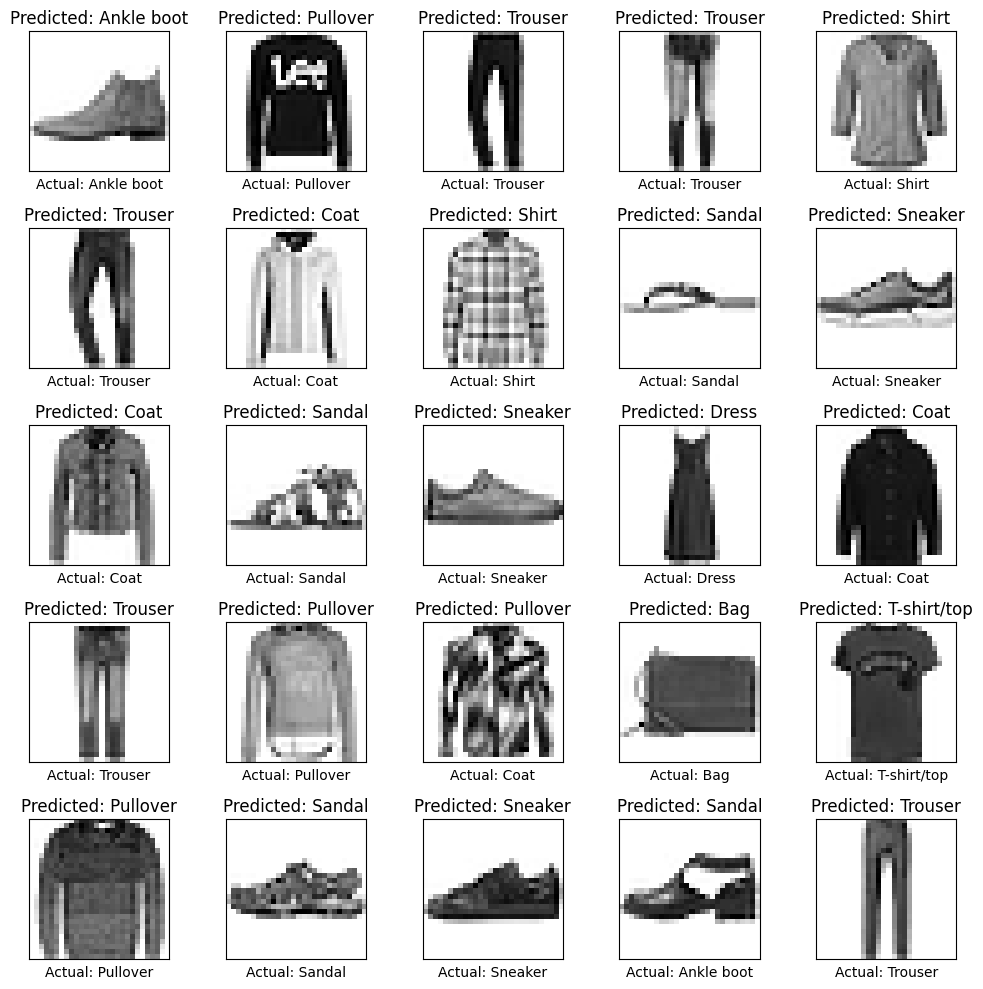

In [13]:
# Class names for Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel("Actual: " + class_names[true_labels[i]])
    plt.title("Predicted: " + class_names[predictions[i]])
plt.tight_layout()
plt.show()
